# Microsoft Film Creation Strategies Analysis

![example](https://github.com/learn-co-curriculum/dsc-project-template/blob/template-mvp/images/director_shot.jpeg?raw=1)

## Overview

[Microsoft](https://en.wikipedia.org/wiki/Microsoft), as one of the most renowned tech companies in the world, popular for developing the Windows Operating System, is looking to dive into the industry of film creation. This project aims to **provide guiding insights to Microsoft as it begins its content creation journey** by analyzing popular Box Office films from other large companies. This analysis mainly focuses on the genre, runtime, rating, profits and, the producing studio of films that perform best at box Office.

## Business Problem

Microsoft is planning to launch a new movie studio but **lacks insight** into what types of films are most successful in today's market. By analyzing data on box office performance, genres, production studios and audience ratings, **we aim to identify trends that can guide Microsoft's content creation strategy and maximize both domestic and international success**.

## Data Understanding

The data files provide the title of the film, year of creation of the film, the average rating of the film as well as other attributes of the film (e.g. film runtime, domestic and international profits).
The data used in the analysis has films that have been produced from 2010-2018.
Every film associated with the analysis has a unique title name as its unique attribute.

### Reading and Previewing data

In [ ]:
import pandas as pd

In [ ]:
box_office_data = pd.read_csv('bom.movie_gross.csv')
movie_info = pd.read_csv('title.basics.csv')
ratings_data = pd.read_csv('title.ratings.csv')

#### Box Office Film Data

In [ ]:
box_office_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
box_office_data.shape

(3387, 5)

In [ ]:
box_office_data.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
box_office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The box office information has a total of 3387 rows and 5 columns. There are categorical columns and numerical columns (with one having integers and another having floats).

There appears to be missing values in the studio, domestic_gross and foreign_gross columns.

#### Movie Information Data

In [ ]:
movie_info.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
movie_info.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [ ]:
movie_info.shape

(146144, 6)

In [ ]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The movie information data has a total of 146144 rows and 6 columns. There are categorical columns and numerical columns (with one having integers and another having floats).


There appears to be missing values in majority of the columns.

#### Ratings Data

In [ ]:
ratings_data.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
ratings_data.shape

(73856, 3)

In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The ratings information data has a total of 73856 rows and 3 columns. Each column has a different datatype (string, float and integer resp.) and there are no missing values in either of the columns.

## Data Cleaning

### Box Office Information Data

For the box office information data, there was a small percentage of missing values in the studio column and domestic_ gross column which could be solved by dropping the rows.

A large fraction of the foreign gross column was missing as well. I decided that it would be best to drop the rows instead of filling them with the mean/median as it would sway the analysis which would yield erenous insights.

I removed comma separators from values in the foreign_gross column changed its datatype to float so that I can use it for calculation.



In [ ]:
# Checking for missing valies in the dataset
box_office_data.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [ ]:
# Dropping the null values in the dataset
box_office_data = box_office_data.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'])
box_office_data.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


In [ ]:
# Changing the datatype of foreign_gross to the datatype float
box_office_data['foreign_gross'] = box_office_data['foreign_gross'].str.replace(',', '')
box_office_data['foreign_gross'] = box_office_data['foreign_gross'].astype(float)

### Movie Information Data

For the movie information data, I did the same procedure as the box office information data which was to drop the missing data as I lacked the required information to fill in the missing values.

I then separated the genres into individual strings and extracted the first genre and added it to a new column called Main Genre for grouping later on.

In [ ]:
# Checking for null values in the dataset
movie_info.isna().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [ ]:
# Dropping the null values in the dataset
movie_info = movie_info.dropna(subset=['primary_title', 'original_title', 'runtime_minutes', 'genres'])
movie_info.isna().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,0
genres,0


In [ ]:
# Separating the genres and selecting the first one
movie_info['Main_genres'] = movie_info['genres'].map(lambda x: x.split(',')[0])

In [ ]:
movie_info['Main_genres'].value_counts()

,count
Main_genres,
Documentary,33766
Drama,24535
Comedy,17481
Action,8110
Biography,7564
Horror,4974
Adventure,4243
Crime,3315
Thriller,1931


### Merging the Datasets

First, I merged the movie information data and rating information data into one dataset called movie and rating so that I could collect all the information on a movie before merging the resulting dataset with the box office data.

I then removed the unnecessary columns e.g start_year as we already have the year column in the box office information data.

In [ ]:
# Merging the movie and ratings information datasets
movie_and_rating = movie_info.merge(ratings_data, on='tconst', how='inner')
movie_and_rating

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Main_genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Adventure,8.1,263
...,...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",Drama,8.7,136


In [ ]:
# Merging all the datasets
combined_film_data = box_office_data.merge(
    movie_and_rating, left_on='title', right_on='primary_title', how= 'inner'
)
combined_film_data = combined_film_data.drop(columns=['tconst', 'primary_title', 'original_title', 'start_year', 'genres'])
combined_film_data

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,Main_genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,Adventure,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,Adventure,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,Action,7.0,657690
...,...,...,...,...,...,...,...,...,...
1762,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,105.0,Action,8.0,16854
1763,I Still See You,LGF,1400.0,1500000.0,2018,98.0,Fantasy,5.7,5010
1764,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,98.0,Biography,6.2,4653
1765,Time Freak,Grindstone,10000.0,256000.0,2018,104.0,Comedy,5.7,3455


Combining the three files yields a single dataset for feature engineering and analysis. I exclude any unmatched data to ensure there are no missing values for some features.

I cleaned the column names to ensure consistency in their naming

In [ ]:
# Creating a dictionary with cleaned column names
cleaned_cols = {
  'title':'Title',
  'studio':'Studio',
  'domestic_gross':'Domestic_Gross',
  'foreign_gross':'Foreign_Gross',
  'Main_genres':'Main_Genres',
  'year':'Year',
  'runtime_minutes':'Runtime_Minutes',
  'averagerating':'Average_Rating',
  'numvotes':'Num_Votes'
}

# Modifying the column names to the cleaned ones
combined_film_data.columns = combined_film_data.columns.map(cleaned_cols)
combined_film_data.columns

Index(['Title', 'Studio', 'Domestic_Gross', 'Foreign_Gross', 'Year',
       'Runtime_Minutes', 'Main_Genres', 'Average_Rating', 'Num_Votes'],
      dtype='object')

In [ ]:
# Previewing the dataframe with modified column names
combined_film_data.head()

,Title,Studio,Domestic_Gross,Foreign_Gross,Year,Runtime_Minutes,Main_Genres,Average_Rating,Num_Votes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,Adventure,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,Adventure,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,Action,7.0,657690


### Feature Engineering

I created a Total gross column which is the sum of both domestic and international profits made by the film.



In [ ]:
# Creating Total_gross column which is the sum of domestic and international gross
combined_film_data['Total_gross'] = (
    combined_film_data['Domestic_Gross'] + combined_film_data['Foreign_Gross']
)
combined_film_data.head()

,Title,Studio,Domestic_Gross,Foreign_Gross,Year,Runtime_Minutes,Main_Genres,Average_Rating,Num_Votes,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,Adventure,6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,Adventure,5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,Action,7.0,657690,6.239000e+08


In [ ]:
combined_film_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1767 non-null   object 
 1   Studio           1767 non-null   object 
 2   Domestic_Gross   1767 non-null   float64
 3   Foreign_Gross    1767 non-null   float64
 4   Year             1767 non-null   int64  
 5   Runtime_Minutes  1767 non-null   float64
 6   Main_Genres      1767 non-null   object 
 7   Average_Rating   1767 non-null   float64
 8   Num_Votes        1767 non-null   int64  
 9   Total_gross      1767 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 138.2+ KB


The resulting dataset has 1767 rows and 9 columns. The datatypes have been converting to the required one and there are no missing values in the dataset.

I saved the resulting dataframe to a csv file named `Cleaned_Dataset.csv`, which is accessible in the data folder in this repository.

## Analysis

In [ ]:
# Importing relevant libraries for analysis
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Total Gross by Genre

**Action, Adventure and Comedy** are the top three revenue-generating genres. This indicates that they have **broad audience appeal and strong market performance.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

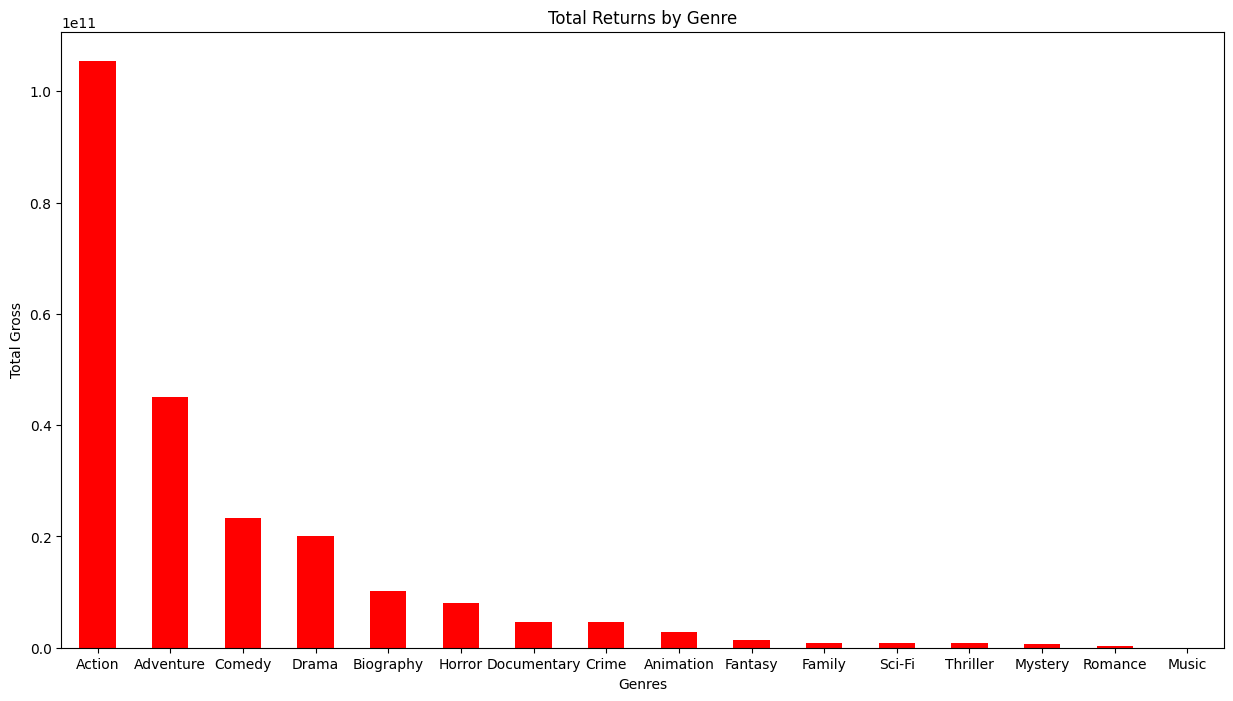

In [ ]:
plt.figure(figsize=(15, 8))

# Grouping by Genre and finding the total gross of each Genre
genre_gross = combined_film_data.groupby('Main_Genres')['Total_gross'].sum().sort_values(ascending=False)

# Plotting a bar graph of total gross by genre
genre_gross.plot(kind='bar', color='red')
plt.ylabel('Total Gross')
plt.xlabel('Genres')
plt.xticks(rotation=0)
plt.title('Total Returns by Genre');

### Runtime vs Gross

Films with a moderate to long runtime **(between 100 to 150 minutes)** tend to generate higher box office returns.
Extremely short or overly long films show reduced returns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

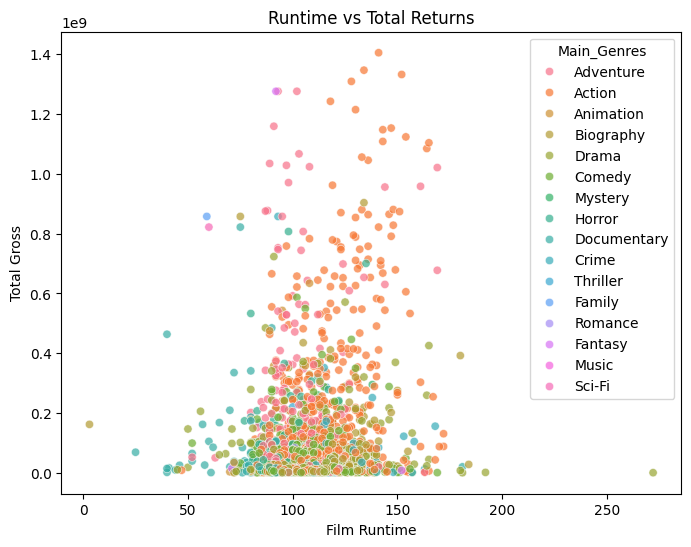

In [ ]:
# Plotting a scatterplot of runtime vs total gross by genre
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_film_data,
    x='Runtime_Minutes',
    y='Total_gross',
    hue='Main_Genres',
    alpha=0.7
)
plt.ylabel('Total Gross')
plt.xlabel('Film Runtime')
plt.title('Runtime vs Total Returns');

### Rating vs Gross

Films with **average ratings between 6.0 and 8.0** tend to perform better financially. There's a moderate positive correlation between audience approval and revenue which means that other factors like genre, marketing etc. also heavily influence box office success.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

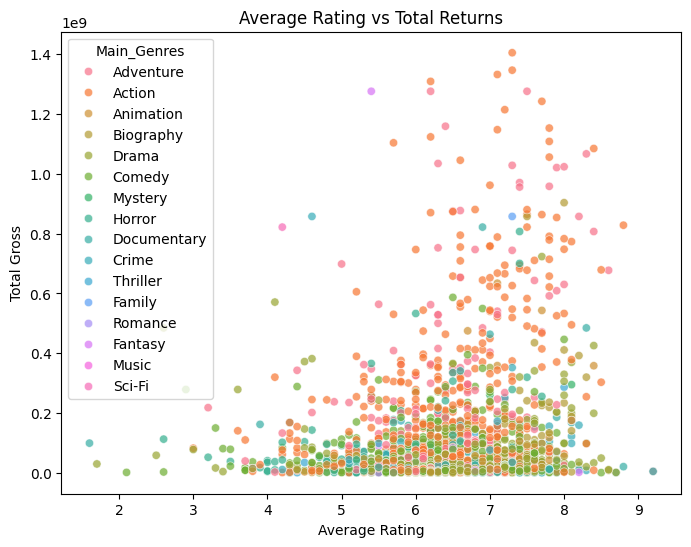

In [ ]:
# # Plotting a scatterplot of average rating vs total gross by genre
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_film_data,
    x='Average_Rating',
    y='Total_gross',
    hue='Main_Genres',
    alpha=0.7
)
plt.ylabel('Total Gross')
plt.xlabel('Average Rating')
plt.title('Average Rating vs Total Returns');

### Average rating by genre

Music, Documentary and Biography films tend to receive higher average ratings, suggesting they have a higher audience appeal. However these genres don't align with the highest grossing categories like Action or Comedy.

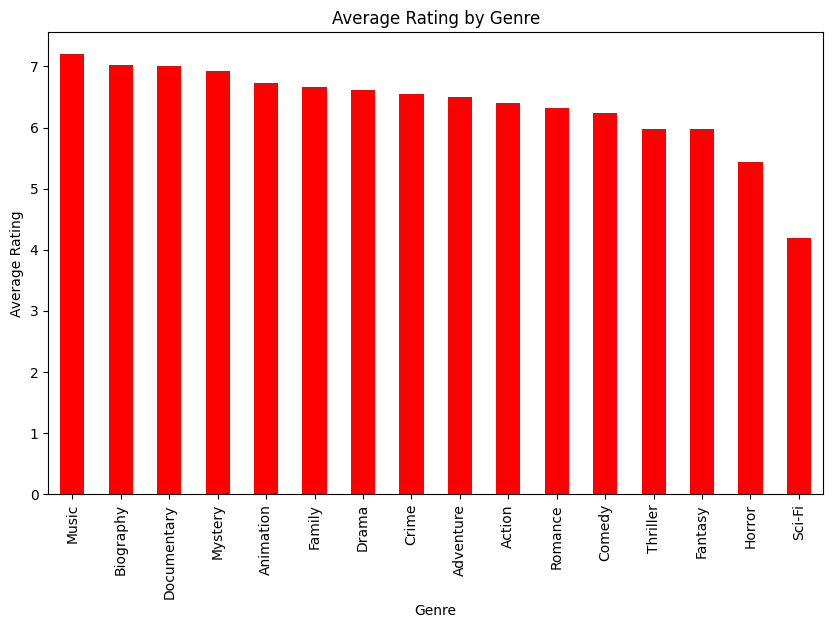

In [ ]:
plt.figure(figsize=(10, 6))

# Grouping by genre and finding the average rating of each genre
genre_rating = combined_film_data.groupby('Main_Genres')['Average_Rating'].mean().sort_values(ascending=False)

# plotting a bar chart of average rating by genre
genre_rating.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre');

### Trends Over Time

In [ ]:
movies_by_year = combined_film_data.groupby('Year').agg({
    'Total_gross':'sum',  # sum of total gross of films in a year
    'Title':'count',  # count of films in a year
    'Runtime_Minutes':'mean'  # mean of runtime of films in each year
})
movies_by_year = movies_by_year.rename(columns={'Title':'Film_Count'})
movies_by_year

,Total_gross,Film_Count,Runtime_Minutes
Year,,,
2010,2.069563e+10,218,106.532110
2011,2.429282e+10,266,105.575188
2012,2.207398e+10,212,106.867925
2013,2.824824e+10,182,108.681319
2014,2.446161e+10,199,107.457286
2015,2.709573e+10,182,108.280220
2016,2.676248e+10,179,110.368715
2017,2.998271e+10,170,110.517647
2018,2.552579e+10,159,108.641509


The total box office returns have shown a **fluctuating trend** over the years. There were significant spikes in 2011 and 2013, while 2012 and 2014 experienced noticeable declines.

The average runtime of films has **generally increased over time**, following a sharp drop in 2011. An exception to this trend occurred in 2018, where runtime saw a significant decline compared to 2017 - This suggests a gradual shift toward longer storytelling formats, although shorter films have gained popularity in 2018.

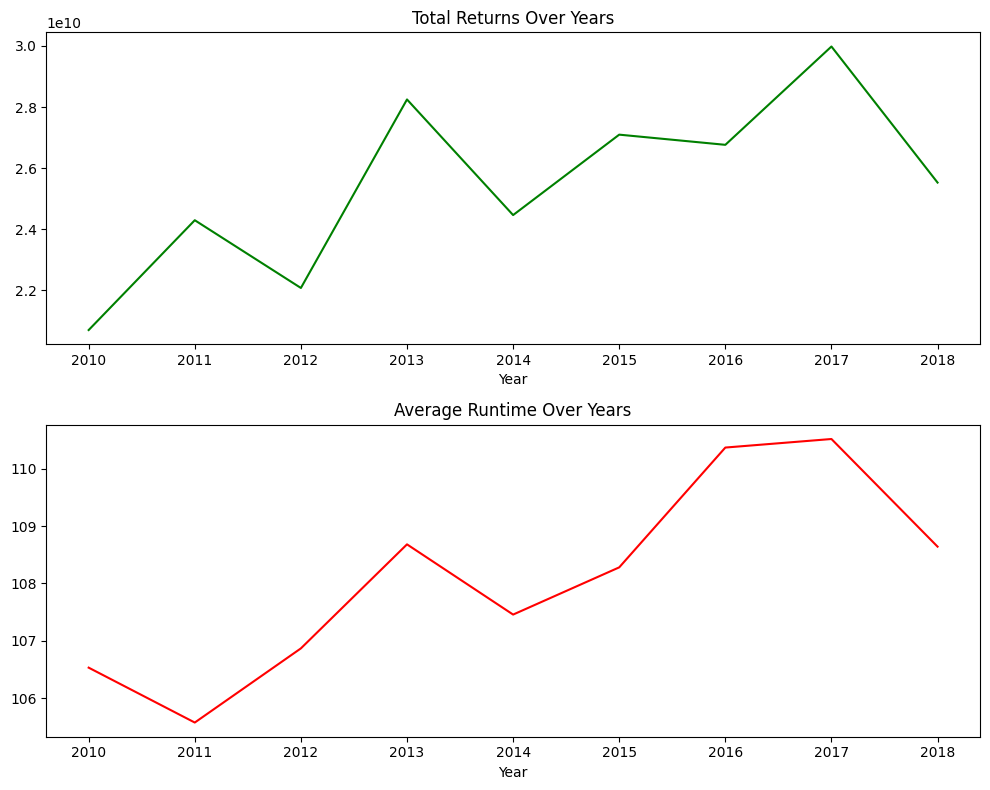

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting a line graph of Total gross over time in the first row of the figure
movies_by_year['Total_gross'].plot(
    ax=ax[0],
    title='Total Returns Over Years',
    color='green'
)

# Plotting a line graph of Total gross over time in the second row of the figure
movies_by_year['Runtime_Minutes'].plot(
    ax=ax[1],
    title='Average Runtime Over Years',
    color='red'
)

plt.tight_layout();

## Conclusions

- **Action, Adventure and Comedy films** lead in total box offic gross, proving to be the most commercially successful genres.
- Films with runtimes between **100 to 150 minutes** tend to perform better financially as they strike a balance between depth and watchability.
- **Temporal trends** - Total returns fluctuate year by year with notable spikes and dips. Runtime has generally increased over time, with a few outliers
- Genres with high audience appeal such as Drama and Documentary tend to have lower gross, while popular genres like Action perform better at box office level despite their lower average ratings.

## Recommendations

This analysis leads to five recommendations for Microsoft's content creation journey:
- **Start with films with Action, Adventure and Comedy**, which have a high global market appeal to maximize returns.
- **Prioritize films with strong reception potential.** Aim to produce films with an average rating of 7.0+ as they are most likely to yield high results.
- **Target Runtimes between 100 to 150 minutes**, where box office performance and viewer engagement tend to be optimal.
- **Balance Quality and Popularity**. Consider including occasional critically driven content such as Drama and Documentary films to brand credibility.
- **Stay responsive to trends**. Keep track of year-by-year trends in genre performance, runtime norms and viewer preference to stay competitive and agile.